In [1]:
import numpy                    as np
import scipy.io.wavfile         as wav
import scipy.sparse as scilin
import matplotlib.pyplot        as plt
import sklearn.decomposition    as skd
import math
import numpy.linalg as la

In [2]:
# load data and set some helper variables
X = np.load("../Data/digits-labels.npz")["d"]
m, n = X.shape # m is number of features and n is number of images
k = 36 # k is the number of pc's we want

print(f"We have {n} images of vectorized length {m}. We are trying to reduce these images to be {k}-dimensional.")

We have 10000 images of vectorized length 784. We are trying to reduce these images to be 36-dimensional.


In [3]:
def pca(centeredData, numOfComponents):
    [U,s,Vt] = la.svd(centeredData)
    Uk = U[:,:numOfComponents]
    sk = s[:numOfComponents]
    Wp = np.diag(sk**-0.5) @ Uk.T
    return Wp

In [4]:
def ICA(Zp, thresh=50, alpha=1e-5):
    k, n = np.shape(Zp)
    W = np.eye(k)
    y = W @ Zp
    M, N = np.shape(y)
    mag_dW = thresh *100
    i = 0
    while (mag_dW > thresh):
        gradW = ((N*np.eye(k) - 2 * np.tanh(y) @ y.T)) @ W
        newW = W + alpha * gradW
        mag_dW = np.linalg.norm(gradW)
        W = newW
        y = W @ Zp
        if(i%100 == 0):
            print(mag_dW)
        i+=1
    return W

In [5]:
def nmf(X, tol=.1, max_iter=5000, n_components=36):

    # Random initialization of weights
    W = np.random.rand(X.shape[0], n_components)
    H = np.random.rand(n_components, X.shape[1])

    # A very big number for initial error
    oldlim = 1e5

    # A very small number to ensure matrices are strictly positive
    eps = 1e-7
    
    
    for i in range(max_iter):
      
        # Multiplicative update steps
        H = H * ((W.T.dot(X) + eps) / (W.T.dot(W).dot(H) + eps))
        W = W * ((X.dot(H.T) + eps) / (W.dot(H.dot(H.T)) + eps))

        # Frobenius distance between WH and X
        lim = np.linalg.norm(X-W.dot(H), 'fro')
        print(abs(oldlim - lim))
        # Check for convergence
        if abs(oldlim - lim) < tol:
            break

        oldlim = lim
        
    return W

(36, 784)
(36, 784)


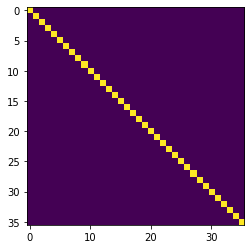

In [6]:
# 1. do pca using svd to get eigen vectors and eigen values

# center data
mu_image = (1/n) * (X @ np.ones((n,1)))
X_zeroed = X - mu_image

# get covariance of X_zeroed
cov_X_zeroed = (1/(n-1)) * (X_zeroed @ X_zeroed.T)

# run PCA on this covariance to get Wp
Wp = pca(cov_X_zeroed, k)
print(np.shape(Wp))
Wp_inv = np.linalg.pinv(Wp)
print(np.shape(Wp))

Zp = Wp@ X_zeroed
plt.imshow(Zp@Zp.T)

In [7]:
# 3. do ica on Zp to get Wi
Wi = ICA(Zp)

13411.520807891244
2519.874575437956
1942.3830019990685
1402.292193252508
1136.2439934813199
883.7847529025178
671.7084744420725
505.64971792563006
425.2449798379876
384.63131238473045
374.8060809221286
367.70777311186146
303.6512624860678
248.2122227946098
231.36926687849146
228.52483707239676
215.0231233082491
188.01029661094566
157.73042975617213
131.00060770712068
109.99836302659256
94.71392244150682
84.26364765584104
77.43290069059168
72.9846316036089
69.86862708194069
67.3217753144246
64.87242826975265
62.29301494914422
59.535583831989996
56.66595681280583
53.80448217198444
51.08017563276299


In [8]:
# 4. Do NMF on non centered data
Wnmf = nmf(X)

99291.69224363058
4.13940669011663
1.2451312190086128
1.7623743314998137
2.6996466122988068
4.252817309384
6.669343823417194
10.032571753787352
13.867265264977163
16.948308688675183
18.09898130903673
17.362014936777314
15.707781045158981
13.926433778635214
12.31854341576718
10.937537864025671
9.775772516036227
8.810999190247799
8.010162256580202
7.335895238774015
6.754036210742356
6.237305798183627
5.765610646265827
5.325391857200145
4.909234179874943
4.515063088360193
4.144579016781563
3.800828689544403
3.485755401081235
3.1992679930883696
2.939792600551698
2.704949881830373
2.492261874554174
2.2999812202889416
2.126918016343552
1.9716760221637628
1.8324597602561425
1.7073888726254722
1.5948196470112634
1.4933550179301278
1.401661980869676
1.3185026791491055
1.2428885102679033
1.1740581033665194
1.1113533931706456
1.054199936423629
1.0021099721197402
0.9545670681718548
0.9109594061945359
0.870673540706548
0.8331657444326197
0.7979749700396042
0.7647771684800659
0.7334133457769099
0.70

In [16]:
WI = Wi @ Wp
WI_inv = np.linalg.pinv(W)

In [17]:
def plotter(data):
    fig, axs = plt.subplots(6, 6)

    for i in range(6):
        for j in range(6):
            dataIndex = 6*i+j
            axs[i, j].imshow(np.reshape(data[:,dataIndex],(28,28),'F'), cmap=plt.cm.afmhot)
    counter = 0
    for ax in axs.flatten():
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])

        counter += 1
    fig.set_figheight(8)
    fig.set_figwidth(8)

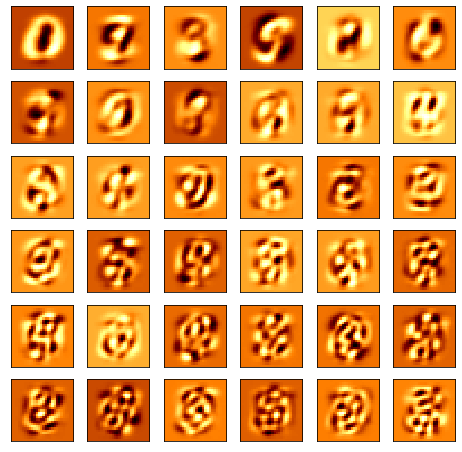

In [18]:
plotter(Wp_inv)

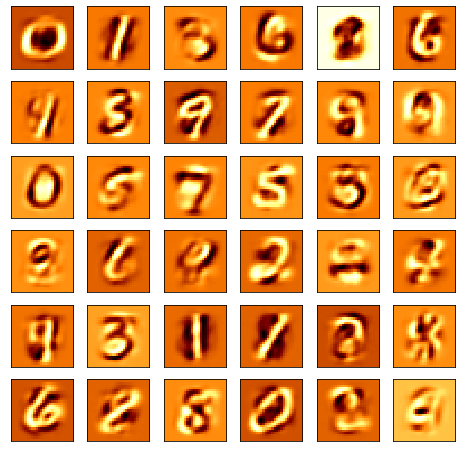

In [19]:
plotter(WI_inv)

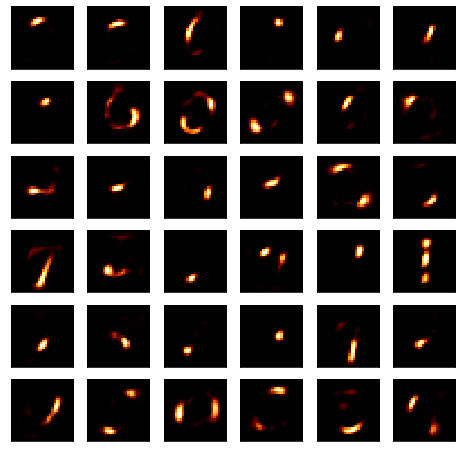

In [20]:
plotter(Wnmf)